<a href="https://colab.research.google.com/github/Kathi3/fictional-telegram/blob/main/Hypothyroid_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroid project

Adapted from Terry Migwi's  work

##1. Defining the question

### Specifying the question

This study is attributed to a clinical camp conducted by Nairobi Hospital to test for hypothyroidism. The data collected focussed on thyroid patients.
 
The aim of the study is to determine whether or not the patient's symptoms indicate that the patient has hypothyroidism using the healthcare datasets provided by building the following models:

1.   Decision Trees
2.   Support Vector Machines (SVM)


### Defining the metrics for success

As this study is on healthcare, we cannot stress enough on the importance of precise results. Misclassification could lead to misdiagnosis of a patient and the consequences of this are dire. For this reason, this study wil only be considered successful if the following is achieved:
*   For the decision trees, employ different techniques to optimize the model and alleviate overfitting. Have an accuracy score of less than 0.99 and an F1 score of 0.9

*   For SVM, build a model with an accuracy of above 0.9


###Understanding the context

Thyroid  is one  of the  most common  disease found  in human  beings which  cause  many other  side  effects in the human  body. It is of two types,hypothyroid and hyperthyroid which are explained below:

*   Hypothyroid causes hypothyroidism which is simply  not  enough  thyroid  hormone
*   Hyperthyroid causes hyperthyroidism which is too much thyroid hormone.

Either imbalance affects the metabolism in the body. Hypothyroidism  causes a reduction in stroke volume and heart rate causing lowered cardiac output with a decrease in heart sounds. Hypothyroidism is a condition that underlies  most chronic degenerative diseases and hormone irregularities and results in a weakened immune system. Hyperthyroidism causes the body’s processes to speed up hence causing nervousness, anxiety, rapid heartbeat, hand tremor, excessive sweating, weight loss, and sleep problems, among other symptoms.

This study will focus on hypothyroidism. To prevent the conditions mentioned above, prior diagnosis of Thyroid is very important and  beneficial for the  betterment of human life, and an early diagnosis and detection of hypothyroidism can help human beings fight against this disease.


###Recording the experimental design

The following steps wil be taken in this study:

1.   Importing libraries and loading datasets
1.   Checking the dataset and the components
1.   Checking for possible anomalies in the dataset
1.   Conducting necessary data preparation procedures
1.   Conducting Exploratory Data Analysis and documenting the findings
1.   Building a baseline model that we will use to compare our models to
1.   Building decision trees and optimizing the trees for the best results
1.   Determining appropriate data for SVM and training the data to the SVM model



##2. Reading the data

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading dataset
hypothyroid = pd.read_csv("hypothyroid.csv")


In [ ]:
# previewing the top of the dataset
hypothyroid.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [ ]:
# previewing the bottom of the dataset
hypothyroid.tail()

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
3158  negative  58   F            f  ...            y   95            n   ?
3159  negative  29   F            f  ...            y   98            n   ?
3160  negative  77   M            f  ...            y  104            n   ?
3161  negative  74   F            f  ...            y  137            n   ?
3162  negative  56   F            t  ...            y  143            n   ?

[5 rows x 26 columns]

In [ ]:
# size of the dataset
print('There is {} observations with {} features'.format(hypothyroid.shape[0], hypothyroid.shape[1]))


There is 3163 observations with 26 features


In [ ]:

# checking the columns
hypothyroid.columns.values.tolist() #converting column names to a list

['status',
 'age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG']

**Column descripion** 

*   status: whether the patient has tested positive or negative for hypothyroidism
*   age: the age of the patient
*   sex: the gender of the patient
*   on_thyroxine: whether the patient is on the thyroxine drug or not
*   query_on_thyroxine: whether the patient has queries on the thyroxine drug or not 
*   on_antithyroid_medication: whether the patient is on medication to decrease release of thyroid hormones or not
*   thyroid_surgery: whether the patient has undergone thyroid surgery or not
*   query_hypothyroid: whether a patient has queries on hypothyroidism(under-active thyroid) hormone or not
*   query_hyperthyroid: whether the patient has queries on hyperthyroism(over-active thyroid) or not
*   pregnant: whether the patient is pregnant or not
*   sick: whether the patient is sick or not
*   tumor: whether the patient has had a tumor or not
*   lithium: whether the patient is on lithium drugs or not
*   goitre: whether the patient has goitre or not
*   TSH_measured: Whether the patient's levels of thyroid stimulating hormone have been measured or not
*   TSH : level of thyroid stimulating hormones in the patient
*   T3_measured:whether the patient's levels of triiodothyronine hormone have been measured or not
*   T3: levels of triiodothyronine hormone in the patient
*   TT4_measured: whether the patient's levels of total thyroxine hormones has been measured or not
*   TT4: the levels of the total thyroxine hormones in the patient
*   T4U_measured: whether the patient's thyroid utilization rate has been tested or not 
*   T4U: the rate of thyroid utilization in a patient
*   FTI_measured: _free thyroid index_: whether the patient's thyroid binding capacity has been measured or not
*   FTI: thyroid binding index of a patient
*   TBG_measured: whether a patient's Thyroxine-binding globulin has been measured or not
*   TBG: the level of thyroxine binding globulin in a patient



In [ ]:
# checking the data types
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

### Data Relevance

The dataset provided contains 26 features that are associated with hypothyroidism. After doing some research, I found out that some the features provided are connected to hypothyroidism as follows: 

*   The thyroid creates two thyroid hormones, triiodothyronine (T3) and thyroxine (T4). These regulate metabolism
*   The production of thyroid hormones is regulated by thyroid-stimulating hormone (TSH). TSH ensures that enough thyroid hormones are made to meet the needs of the body.If the TSH reading is above normal, the patient may have hypothyroidism. If TSH levels are below normal, the patient may have hyperthyroidism or hypothyroidism
*   Some risk factors that could cause hypothyroidism include presence of a goitre, use of medication known to affect thyroid function, pregnancy (during pregnancy, iodine requirements increase hence pregnent women have a higher risk of thyroid problems)
*   Iodine is an essential mineral for thyroid function. Iodine deficiency is one of the most common causes of goiter development, or abnormal enlargement of the thyroid gland
*  Some drugs such as lithium can interfere with thyroid hormone production.
*  Most of the protein-bound T3 and T4 in your body bind to thyroxine-binding globulin(TBG). The serum TBG level test measures the amount of TBG in your blood. This can help doctors assess thyroid problems
*   Gender and age have substantial influence on thyroid function

Although most of these terms are biological, it is clear that the features provided have a connection with having hypothyroidism hence we conclude that the data is relevant for this study. A concern would be the number of null values in the dataset which have to be dealt with so we can make the most out of this data.


###External Datasource Validation

For this dataset, the unit of measurement for the hormone levels is not indicated hence it was a bit difficult to validate the range of the hormone levels. 

From the data, I noted that TSH values ranged from 0 - 500. However, from research I found out that The TSH has a normal test range between 0.4 and 4.0 milli-international units of hormone per liter of blood (mIU/L). This is quite low as compared to what we have hence I made an assumption that the values provided had been converted to a more interepretable form. e.g instead of recording levels per litre of blood, they probably recorded the levels per how much blood an individual has in total

##3. Data Preparation

### Checking for completeness


In [ ]:
# checking for null values
hypothyroid.isnull().values.any()

False

The isnull function returns no null values, however, from previewing the dataset we observe some values with ?. Hence we replace these values with nan so they can be recognized as null values

In [ ]:
# replacing the ? values with nan
hypothyroid.replace('?', np.nan, inplace= True)

In [ ]:
# now checking for null values
hypothyroid.isnull().values.sum()

5329

There are 5329 null values

In [ ]:
# checking the total number of null values per column
hypothyroid.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

There are 8 columns with null values with the TBG column having the most while the sex column has the least number of null values.

In [ ]:
for col in hypothyroid.columns:
  pct_missing = np.mean(hypothyroid[col].isnull())
  print('{}-{}%'.format(col,round(pct_missing*100)))

status-0%
age-14%
sex-2%
on_thyroxine-0%
query_on_thyroxine-0%
on_antithyroid_medication-0%
thyroid_surgery-0%
query_hypothyroid-0%
query_hyperthyroid-0%
pregnant-0%
sick-0%
tumor-0%
lithium-0%
goitre-0%
TSH_measured-0%
TSH-15%
T3_measured-0%
T3-22%
TT4_measured-0%
TT4-8%
T4U_measured-0%
T4U-8%
FTI_measured-0%
FTI-8%
TBG_measured-0%
TBG-92%


#### Dealing with Missing Values


#### Missing values in categorical columns

The column sex contains 73 records of missing values that we would not like to drop hence we shall investigate the columns and from what we find employ different methods of dealing with these values. First, only females get pregnant hence the column 'pregnancy' should contain only females hence we shall look into this to ensure it is so.

In [ ]:
pregnant =hypothyroid[hypothyroid['pregnant'] == 't']
pregnant.shape

(63, 26)

There are 63 records of people who are pregnant in the dataset

In [ ]:
# confirming there are no males in the pregnancy dataframe
male_pregnancy = pregnant[pregnant['sex'] == 'M'] 
male_pregnancy

Empty DataFrame
Columns: [status, age, sex, on_thyroxine, query_on_thyroxine, on_antithyroid_medication, thyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, sick, tumor, lithium, goitre, TSH_measured, TSH, T3_measured, T3, TT4_measured, TT4, T4U_measured, T4U, FTI_measured, FTI, TBG_measured, TBG]
Index: []

There are no male patients who are pregnant in our data which means our data is valid. We now find any missing values in the sex column in the pregnant dataframe and replace them with females

In [ ]:
pregnant['sex'].isnull().any()

True

We have records that contain missing values in the sex column. We investigate how many records these missing values are.

In [ ]:
# checking for null values in the pregnancy column
pregnant['sex'].isnull().sum()

1

We have only one missing value in the sex column. We replace this value with female

In [ ]:
# we locate the records with true pregnancies then replace these values with f to represent female 
hypothyroid.loc[hypothyroid['pregnant'] == 't', 'sex'] = 'F'  


In [ ]:
# checking for remaining null values in the sex column in the entire dataset

hypothyroid.isnull().sum()

status                          0
age                           446
sex                            72
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

The sex column is now down to 72 records, this is quite a number. Lets explore the data a little bit more to find out how best to deal with this.

We find out how many male patients we have and how many female patients we have.

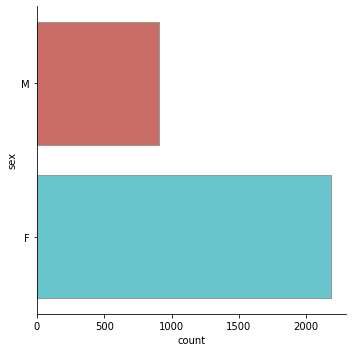

In [ ]:
sns.catplot(y="sex", kind="count",
            palette="hls", edgecolor=".6",
            data=hypothyroid);

A big number of the patients are females. However, we would not like to assume that all the null values in the sex column were all females hence we will check if there are records that contain more than 4 null values then drop these records as these will be too many values to be missing in just one record. 

In [ ]:
hypothyroid = hypothyroid.dropna(thresh=4)
hypothyroid.isnull().sum()

status                          0
age                           446
sex                            72
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

There were no records that were dropped hence all records have less than 4 null values. At this point, the only options we have for the sex column is to either impute the missing values with the mode in that column, which in this case is females or drop the null values. Since the missing values are 72 which is not a huge number compared to the entire dataset, I will drop them as I don't want to assume that they were all records for females or even males if I were to replace.

In [ ]:
hypothyroid = hypothyroid.dropna(subset=['sex'])

hypothyroid.isnull().sum()

status                          0
age                           391
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           456
T3_measured                     0
T3                            683
TT4_measured                    0
TT4                           244
T4U_measured                    0
T4U                           243
FTI_measured                    0
FTI                           242
TBG_measured                    0
TBG                          2836
dtype: int64

####Missing values in the age column

We will investigate the age column first then determine how best to deal with this missing values. We first need to convert the data to appropriate data types

In [ ]:
# coverting age to float datatype
hypothyroid['age'] = hypothyroid['age'].astype('float')

# converting sex and status columns to numerical categories
hypothyroid.loc[hypothyroid.sex == 'F', 'sex'] = 1
hypothyroid.loc[hypothyroid.sex == 'M', 'sex'] = 0
hypothyroid['sex'] = hypothyroid['sex'].astype('category')

hypothyroid.loc[hypothyroid.status == 'hypothyroid', 'status'] = 1
hypothyroid.loc[hypothyroid.status == 'negative', 'status'] = 0
hypothyroid['status'] = hypothyroid['status'].astype('category')

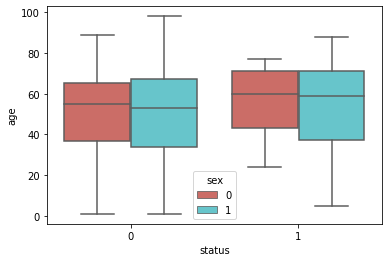

In [ ]:
# boxplots to determine how the age varies with status and sex
sns.boxplot(x='status', y='age', hue='sex', data=hypothyroid, palette = 'hls')


From the graph above, we can see that for people who tested negative(0) for hypothyroidism, the mean age for the males(0) was around 55, and 50 for the females(1). For the people who tested positive(1) for hypothyroidism the mean age for both males and females was around 56. We shall create a function to impute the missing values in the age columns with these mean values

In [ ]:
# imputing the null values in age column with the mean
hypothyroid['age'] = hypothyroid['age'].fillna((hypothyroid['age'].mean()))

In [ ]:
# confirming we now have no null values in the age column
hypothyroid['age'].isnull().sum()

0

In [ ]:
# checking for remaining null values
hypothyroid.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           456
T3_measured                     0
T3                            683
TT4_measured                    0
TT4                           244
T4U_measured                    0
T4U                           243
FTI_measured                    0
FTI                           242
TBG_measured                    0
TBG                          2836
dtype: int64

We still have missing values in the columns that have to be dealt with(hormone levels in the body)

####Missing values in the columns with details of hormone levels

For the remaining missing values, we will first change the datatatypes to more appropriate types, check if the hormone levels were actually measured, if they were, we will impute, if they were not, we will replace these values with zeros

####Obtaining more appropriate datatypes for our columns


In [ ]:
# label encoding categorical columns 
categorical_columns = ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
                       'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre',
                       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

# for column in categorical_columns:
#   hypothyroid[column] = hypothyroid[column].astype('str')

# encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# instantiate label encoder object
le = LabelEncoder()

# apply le on categorical columns
hypothyroid[categorical_columns] = hypothyroid[categorical_columns].apply(lambda col:le.fit_transform(col))

In [ ]:
hypothyroid.head(5)

status   age sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
0      1  72.0   0             0  ...             1   10             0  NaN
1      1  15.0   1             1  ...             1   17             0  NaN
2      1  24.0   0             0  ...             1    0             0  NaN
3      1  24.0   1             0  ...             1    6             0  NaN
4      1  77.0   0             0  ...             1   44             0  NaN

[5 rows x 26 columns]

In [ ]:
# using a for loop to convert all the columns 
for column in categorical_columns:
  hypothyroid[categorical_columns] = hypothyroid[categorical_columns].astype('category')

In [ ]:
# converting all numerical columns to float datatypes
numerical_columns = ['TSH','T3','TT4','T4U','FTI', 'TBG']

# using a for loop to convert all the columns 
for column in numerical_columns:
  hypothyroid[column] = hypothyroid[column].astype('float')

In [ ]:
# confirming we have appropriate datatypes
hypothyroid.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [ ]:
# checking the total number of null values per column that are yet to be dealt with
for col in hypothyroid.columns:
  pct_missing = np.mean(hypothyroid[col].isnull())
  print('{}-{}%'.format(col,round(pct_missing*100)))

status-0%
age-0%
sex-0%
on_thyroxine-0%
query_on_thyroxine-0%
on_antithyroid_medication-0%
thyroid_surgery-0%
query_hypothyroid-0%
query_hyperthyroid-0%
pregnant-0%
sick-0%
tumor-0%
lithium-0%
goitre-0%
TSH_measured-0%
TSH-15%
T3_measured-0%
T3-22%
TT4_measured-0%
TT4-8%
T4U_measured-0%
T4U-8%
FTI_measured-0%
FTI-8%
TBG_measured-0%
TBG-92%


In [ ]:
# Dealing with missing hormonal values
hypothyroid.drop(['TBG','TBG_measured'], axis = 1, inplace=True)

column_values = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

for column in column_values:
  hypothyroid[column].fillna(hypothyroid[column].mean(), inplace = True)

The hormone levels of the columns with null values were actually not measured hence we will fill the nulls with mean

In [ ]:
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

We now have complete data that we can work with.

###Checking for consistency

In [ ]:
# checking for any duplicated records
hypothyroid[hypothyroid.duplicated()]

status    age sex  ...       T4U FTI_measured         FTI
53        1  69.00   1  ...  0.860000            1   61.000000
66        1  62.00   0  ...  1.000000            1   10.000000
124       1  77.00   1  ...  0.670000            1   49.000000
128       1  79.00   1  ...  0.970000            1   48.000000
131       1  50.00   1  ...  0.930000            1   60.000000
...     ...    ...  ..  ...       ...          ...         ...
3066      0  74.00   1  ...  1.180000            1  107.000000
3071      0  51.22   1  ...  0.984965            0  111.777782
3111      0  89.00   0  ...  0.800000            1  103.000000
3124      0  40.00   1  ...  0.984965            0  111.777782
3151      0  58.00   1  ...  1.400000            1  108.000000

[152 rows x 24 columns]

The function returns 77 records that are duplicated, however, loking into the entire rows, these records are not entirely duplicated. Only that most of the values are 0's and 1's hence we will retain them.

### Checking for outliers

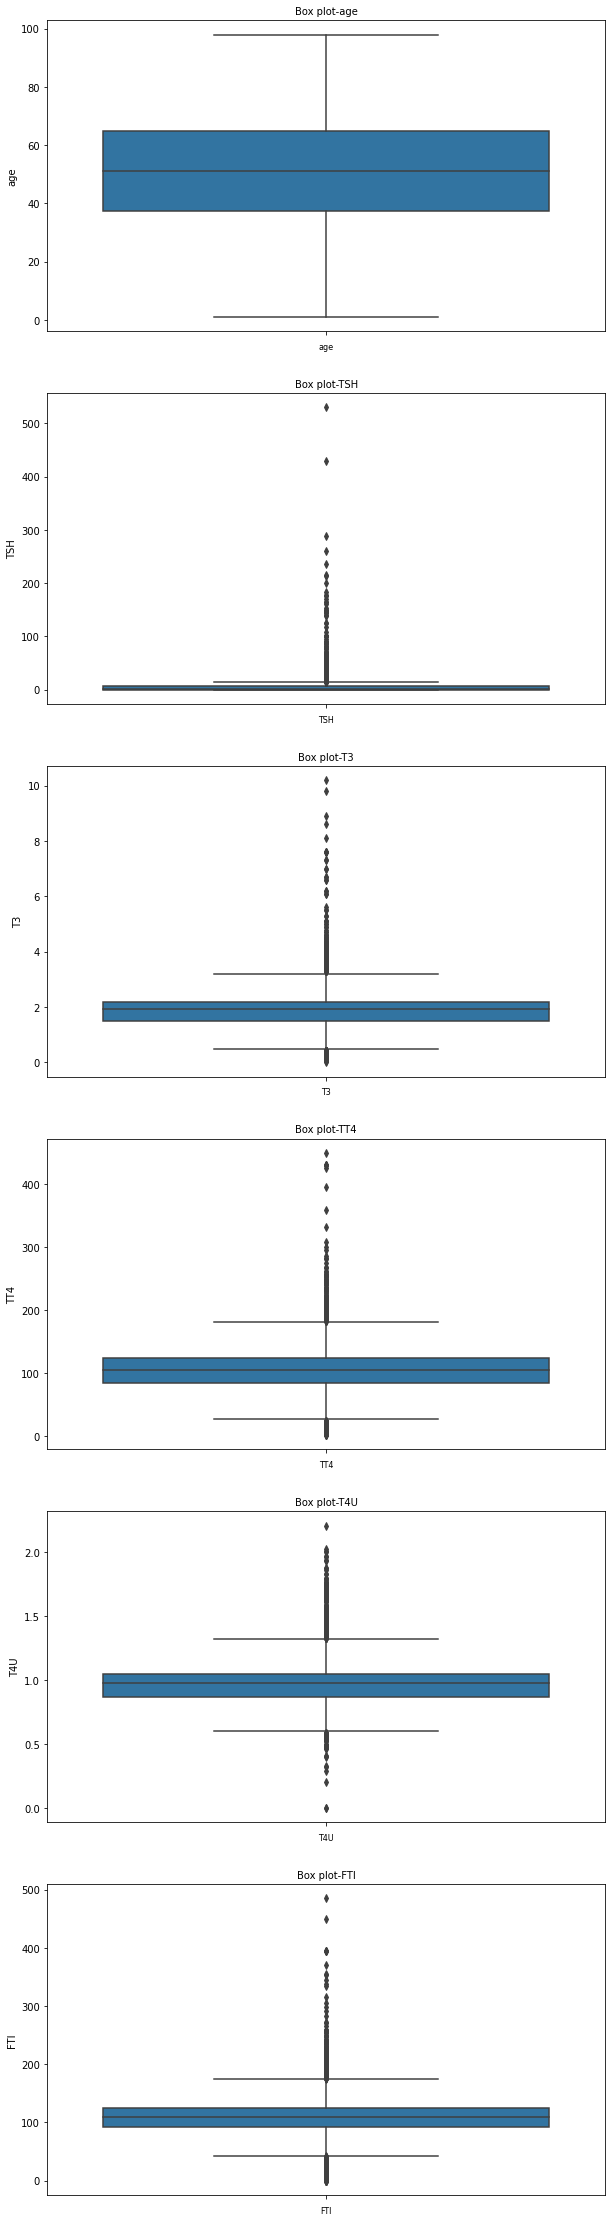

In [ ]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

fig, ax = plt.subplots(len(columns), figsize = (10, 40))

for i, col_val in enumerate(columns):

  sns.boxplot(y= hypothyroid[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

The following are the observations from the box plots:

1.   The age column contains no outliers 
1.   For TSH column, we observe that the data points are a bit concentrated from zero to around 250, there are two observations between 250 and 300 then two observations from 300 to 500.
1.   For T3 column, the observations are between 5 and 10 which seems to be quite ok hence we will not drop any points from this column
1.   The T4U column has observations from around 0 to 2.5, with only one point above 2. We will not drop any observation from here as they don't have such a huge difference
1.   FTI column has points from 0 to 500, with only two observations above 400. These could be outliers but we will not drop them either as they could influence our models graetlty
1.   TBG column has points from 0 to 120. Where points above 60 are a bit scattered, We will retain these points as well.

As this is a healthcare dataset, all the observations are valid as every patient has different levels of hormones in the body, in fact, this is what determines if the patient's condition is normal, mild or severe and how this will affect the diagnosis. Hence we will not remove any of the outliers observed as this could be important data that will help our models with making better decisions

##4. Exploratory Data Analysis

In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas_profiling as pp

from pandas_profiling import ProfileReport
ProfileReport(hypothyroid, title = "hypothyroid data report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Findings from the pandas profiling**

**Overview**

*   We have 18 columns that are categorical data and 7 columns that are have numerical data

*   The following columns are highly correlated with each other:      
        *???* 

*   There are no missing or duplicate values

**Univariate Analysis**

*   The following summarizes the categorical columns:

    _status columns has more parients who tested negative for hypothyroidism as  compared to those who tested positive_

    _sex column has more females than males_

    _most patients were NOT on_thyroxine_

    _most of the patients did NOT have query_on_thyroxine_

    _most patients were NOT on_antithyroid_medication_

    _most patients have NOT had thyroid_surgery_

    _most patients have NO queries on hyperthyroid or hyperthyroid_

    _most patients are NOT pregnant, sick_

    _most patients don't have tumors, goitre_

    _most patients are NOT on lithium_ 


###Univariate Analysis

In [ ]:
# statistical summary
hypothyroid.describe()

age          TSH  ...          T4U          FTI
count  3091.000000  3091.000000  ...  3091.000000  3091.000000
mean     51.220000     5.940528  ...     0.984965   111.777782
std      18.039756    22.292654  ...     0.210511    41.455137
min       1.000000     0.000000  ...     0.000000     0.000000
25%      37.500000     0.000000  ...     0.870000    92.000000
50%      51.220000     1.000000  ...     0.980000   109.000000
75%      65.000000     5.940528  ...     1.050000   125.000000
max      98.000000   530.000000  ...     2.210000   485.000000

[8 rows x 6 columns]

####Median

In [ ]:
for column in columns:
  print(column +':' + str(hypothyroid[column].median()))

age:51.22
TSH:1.0
T3:1.9313953488372078
TT4:106.0
T4U:0.98
FTI:109.0


####Mode

In [ ]:
for column in columns:
  print(column +':' + str(hypothyroid[column].mode()))

age:0    51.22
dtype: float64
TSH:0    0.0
dtype: float64
T3:0    1.931395
dtype: float64
TT4:0    108.419002
dtype: float64
T4U:0    0.984965
dtype: float64
FTI:0    111.777782
dtype: float64


#### Distribution plots

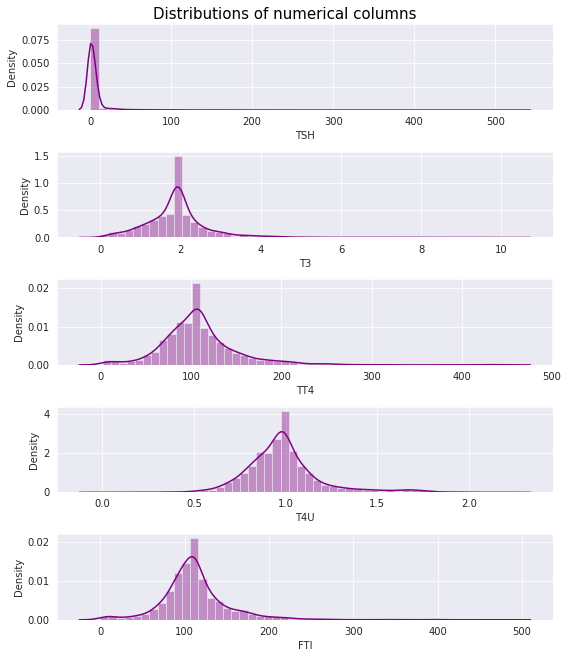

In [ ]:
columns = ['TSH','T3','TT4','T4U','FTI']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (8, 9))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), hypothyroid, columns):
  sns.distplot(hypothyroid[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

**Observations**

1.   ... 
1.   ...



#### Bar Charts

We'll use bar charts to visualize the counts of our categorical variables. This a better way to visualize the the pandas profiling report

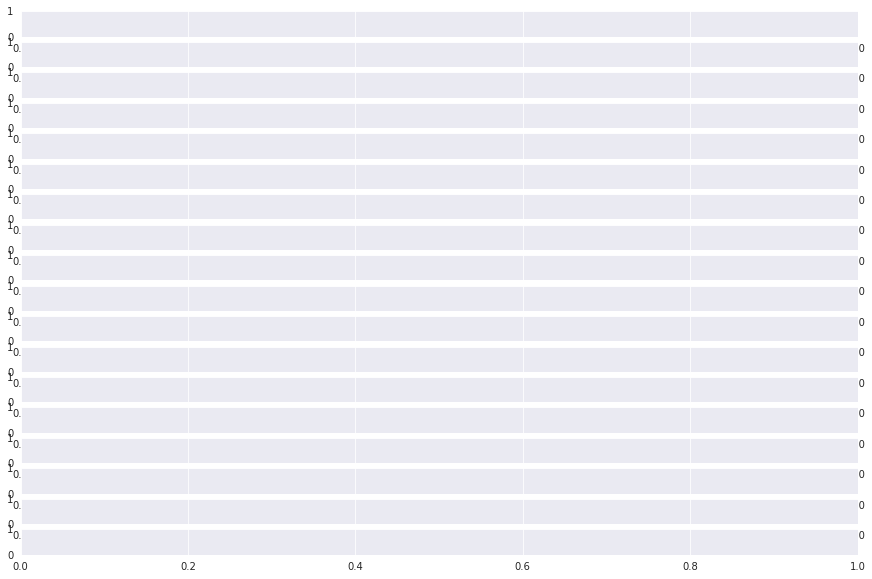

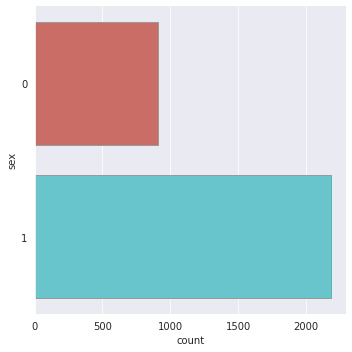

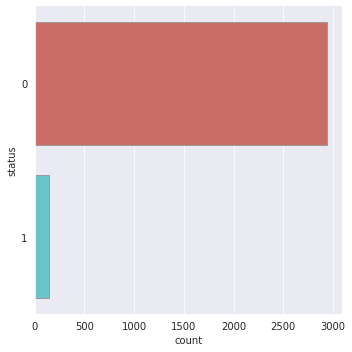

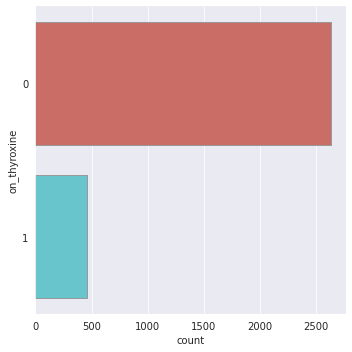

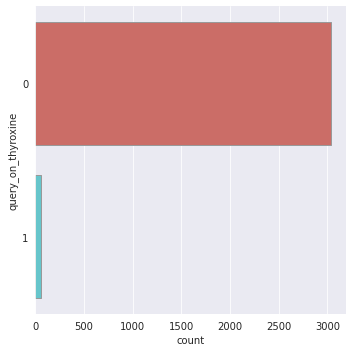

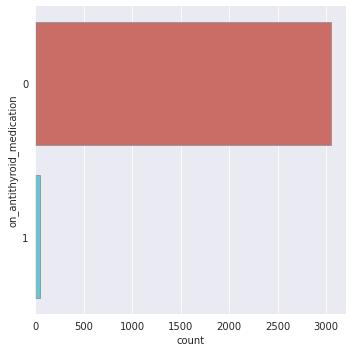

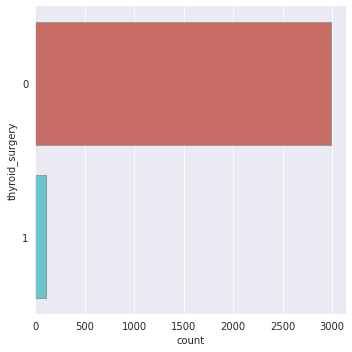

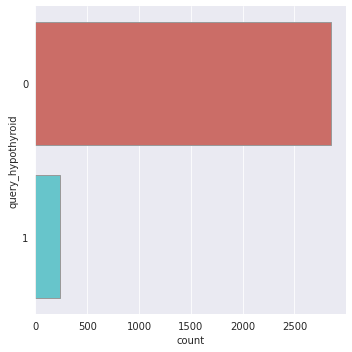

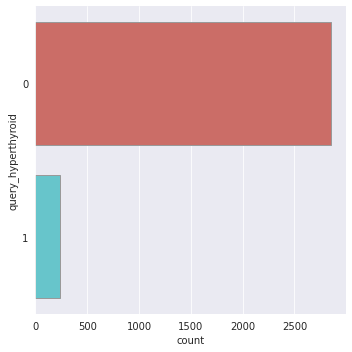

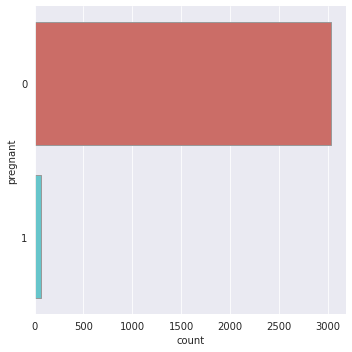

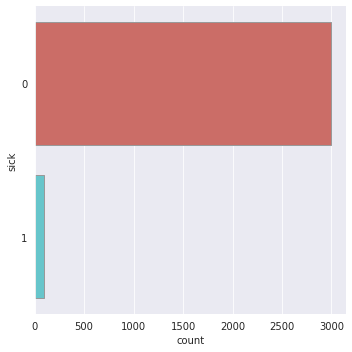

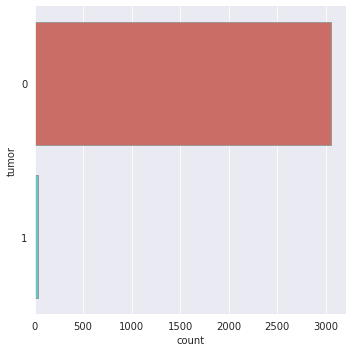

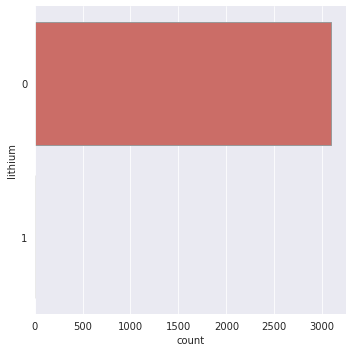

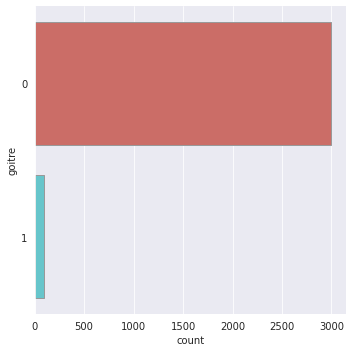

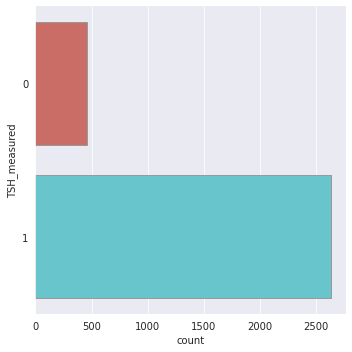

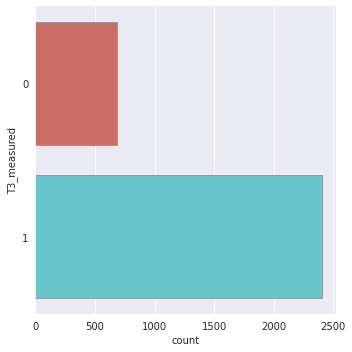

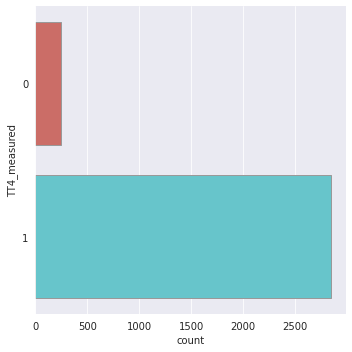

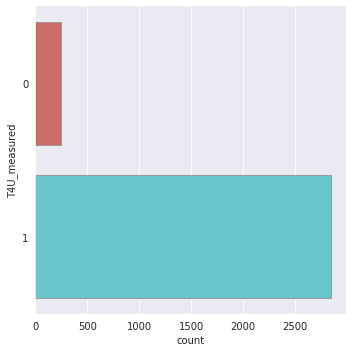

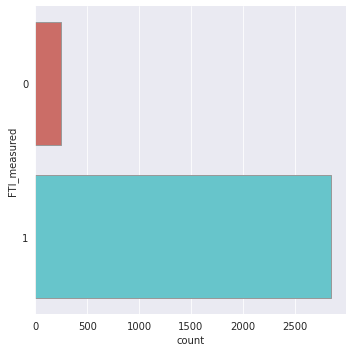

In [ ]:
categorical_columns = ['sex', 'status','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery', 
              'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre',
              'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']          

sns.set_style('darkgrid')

fig, axes = plt.subplots(len(categorical_columns), figsize=(15, 10))

for var, subplot in zip(categorical_columns, axes.flatten()):
  sns.catplot(y=var, kind="count", palette="hls", edgecolor=".6", data=hypothyroid, ax=subplot);


###Bivariate Analysis

We will use cat plots to show how each of the categorical columns relate with the status column.

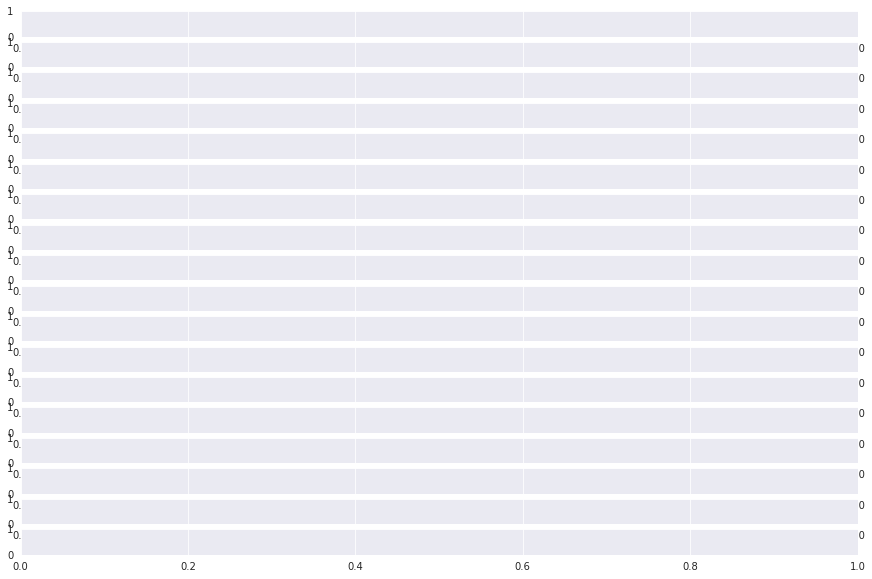

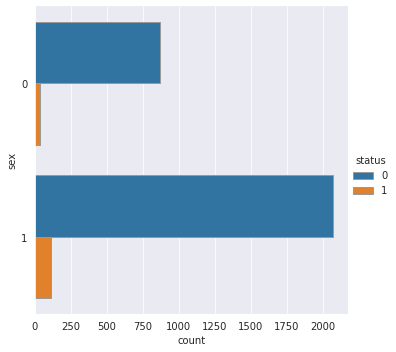

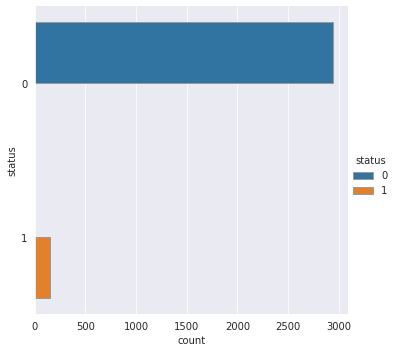

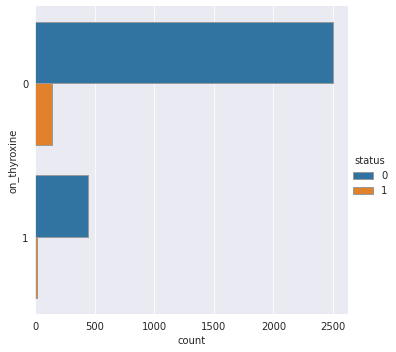

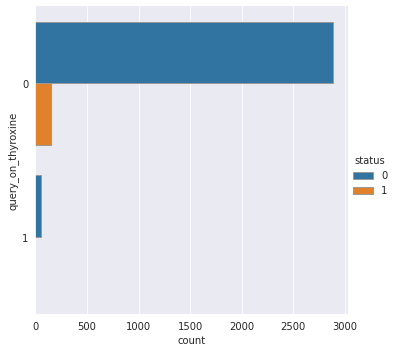

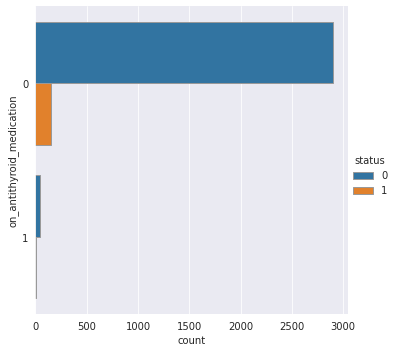

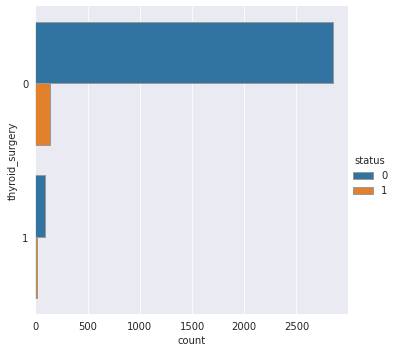

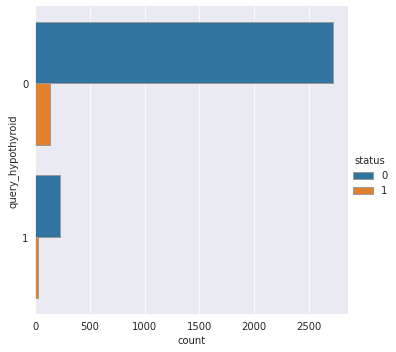

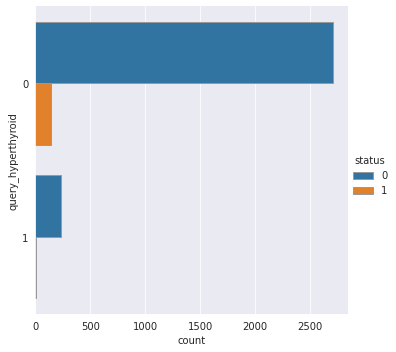

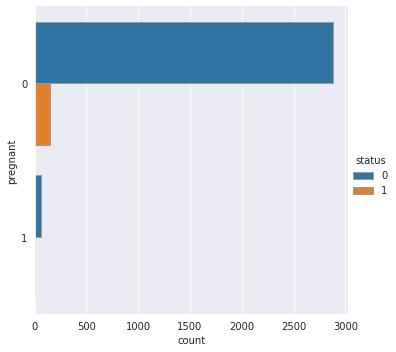

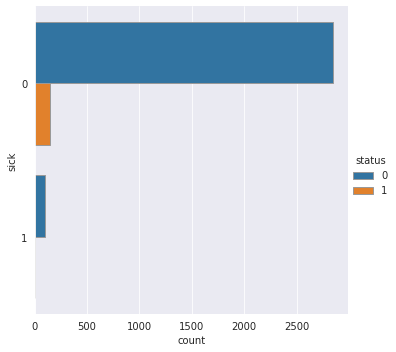

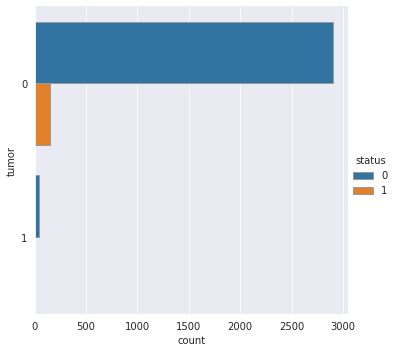

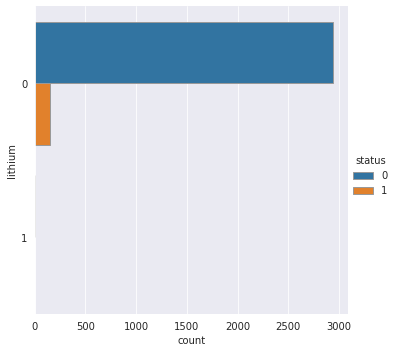

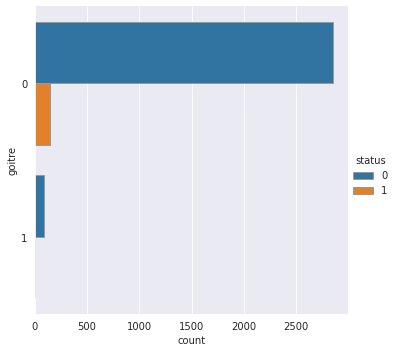

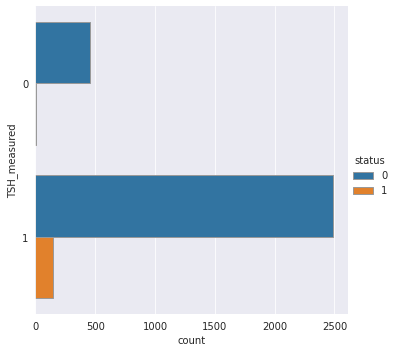

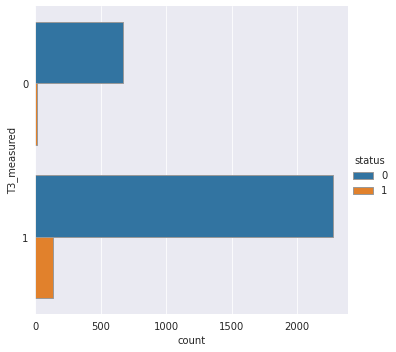

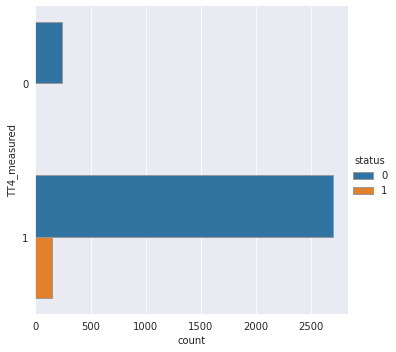

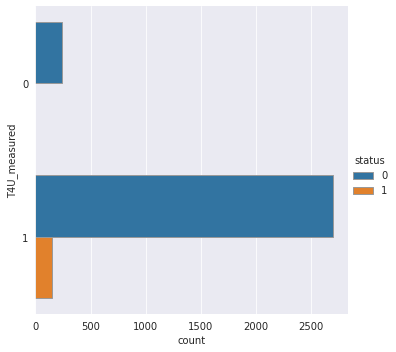

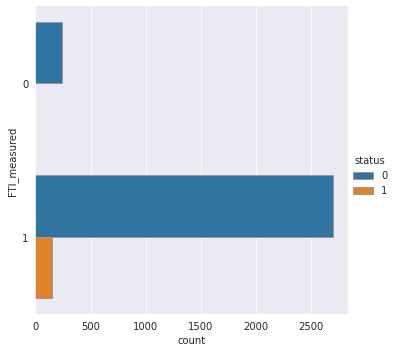

In [ ]:
# plotting cat plots
sns.set_style('darkgrid')

fig, axes = plt.subplots(len(categorical_columns), figsize=(15, 10))
# we will set the hue to be the status column as this is our target variable
for var, subplot in zip(categorical_columns, axes.flatten()):
  sns.catplot(y=var, kind="count", hue="status", edgecolor=".6", data=hypothyroid, ax=subplot);


In [ ]:
# status vs numerical variables
numerical_df = hypothyroid.drop(['sex','age','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
                                 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
                                 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured'],
                                 axis = 1)


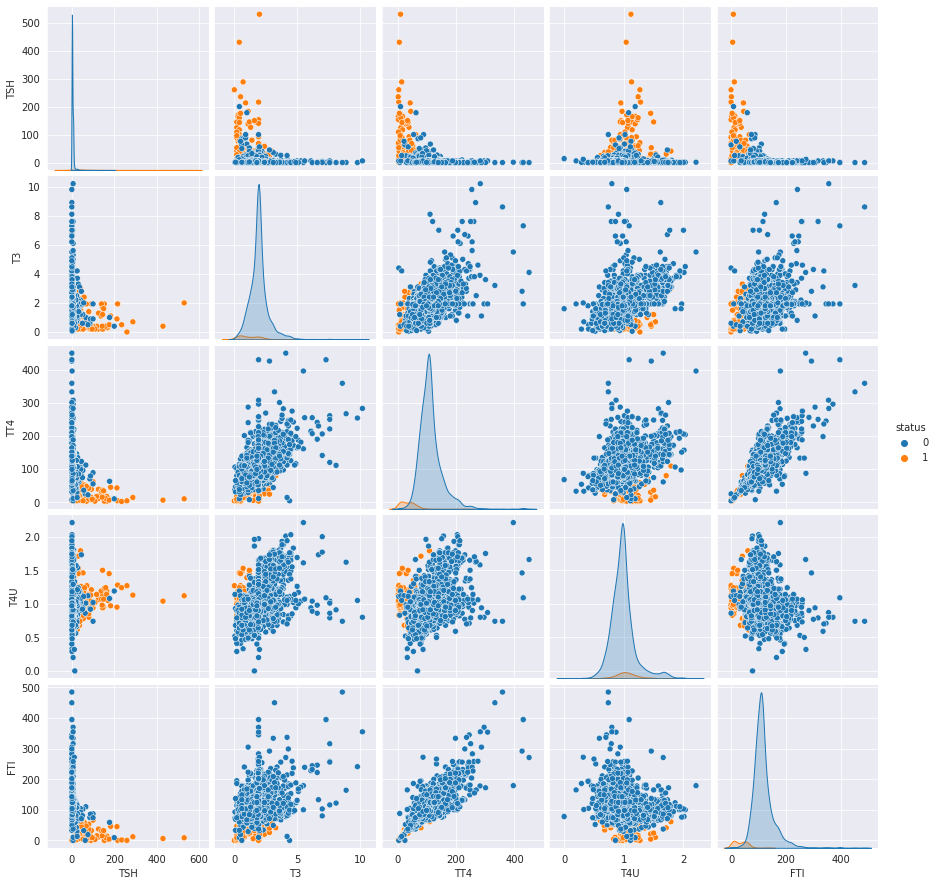

In [ ]:
# plotting scatter plots for the numerical columns and adding status as the hue to distinguish 
# the people who have hypothyroid and those who don't 
sns.pairplot(numerical_df, hue="status")

##5. Baseline Model

Our baseline model will be a decision tree. 

In [ ]:
# necessary imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score, f1_score

In [ ]:
# Creating table to store the results 
models ={'Model':['Decision Tree', 'Random Forest','Ada Boost','Linear SVC',
                  'Polynomial SVC', 'RBF SVC'],
         'Accuracy':[0,0,0,0,0,0],
         'f1_score':[0,0,0,0,0,0]}

df_results = pd.DataFrame(models,columns=['Model','Accuracy','f1_score'])

def model_results(model_type, y_test_data, y_pred_data):
  index_val = df_results[df_results['Model']==model_type].index

  df_results.loc[index_val,'Accuracy']= accuracy_score(y_test_data, y_pred_data)
  df_results.loc[index_val,'f1_score']= f1_score(y_test_data, y_pred_data)
  
  return df_results

##6. Decision Trees

Decison trees are a non-parametric supervised learning method used for classification and regression. They pick a feature from the dataset that meaningfully splits the data, then actively splits the the data into nodes based on the information gain from splitting the features. The splitting stops when there is no more information gained from splitting a particular feature. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

In this study, decision trees learn from data whether to classify a patient as having hyperthyroidism or not with a set of decision rules from the data features. 

In [ ]:
# Split the independent and dependent variables
# our dependent variable is the status of the patient as we want to test whether the 
# patient has hyperthyroidism or not
y = hypothyroid['status'].values

# we will use all the independent variables in the dataset and store them in the test features variable
test_features = hypothyroid.columns.to_list()
test_features.remove('status')

X = hypothyroid[test_features].values

# split the data into train and test sets, using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We will first create a model without any settings or limitations, then include some settings to assess how they affect our model. We will set a max_depth and minimum samples split.

In [ ]:
# we will first 
tree = DecisionTreeClassifier()
# tree = DecisionTreeClassifier(max_depth=5, min_samples_split = 20)

# train it with our training set
tree = tree.fit(X_train, y_train)

# predict based on the model we've created
y_pred = tree.predict(X_test)

# printing the metrics 
model_results('Decision Tree',y_test, y_pred)

Model  Accuracy  f1_score
0   Decision Tree  0.987076  0.857143
1   Random Forest  0.000000  0.000000
2       Ada Boost  0.000000  0.000000
3      Linear SVC  0.000000  0.000000
4  Polynomial SVC  0.000000  0.000000
5         RBF SVC  0.000000  0.000000

What changes does the parameters make to the model?

*   The model without any settings/limitations has an accuracy score of 98.70% 
*   Limiting the maximum depth increases the accuracy of the model i.e a maximum depth of 5 has an accuracy score of ???
*   Specifying the sample split also increases the accuracy of the model. i.e a sample split of 10 has an accuracy score of ??? while a sample split of 20 has an accuracy score of ???
*   The conclusion from using both the min_sample_split and max_depth is that ????

For visualization, we will not limit the tree to any depth or minimu splits.

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

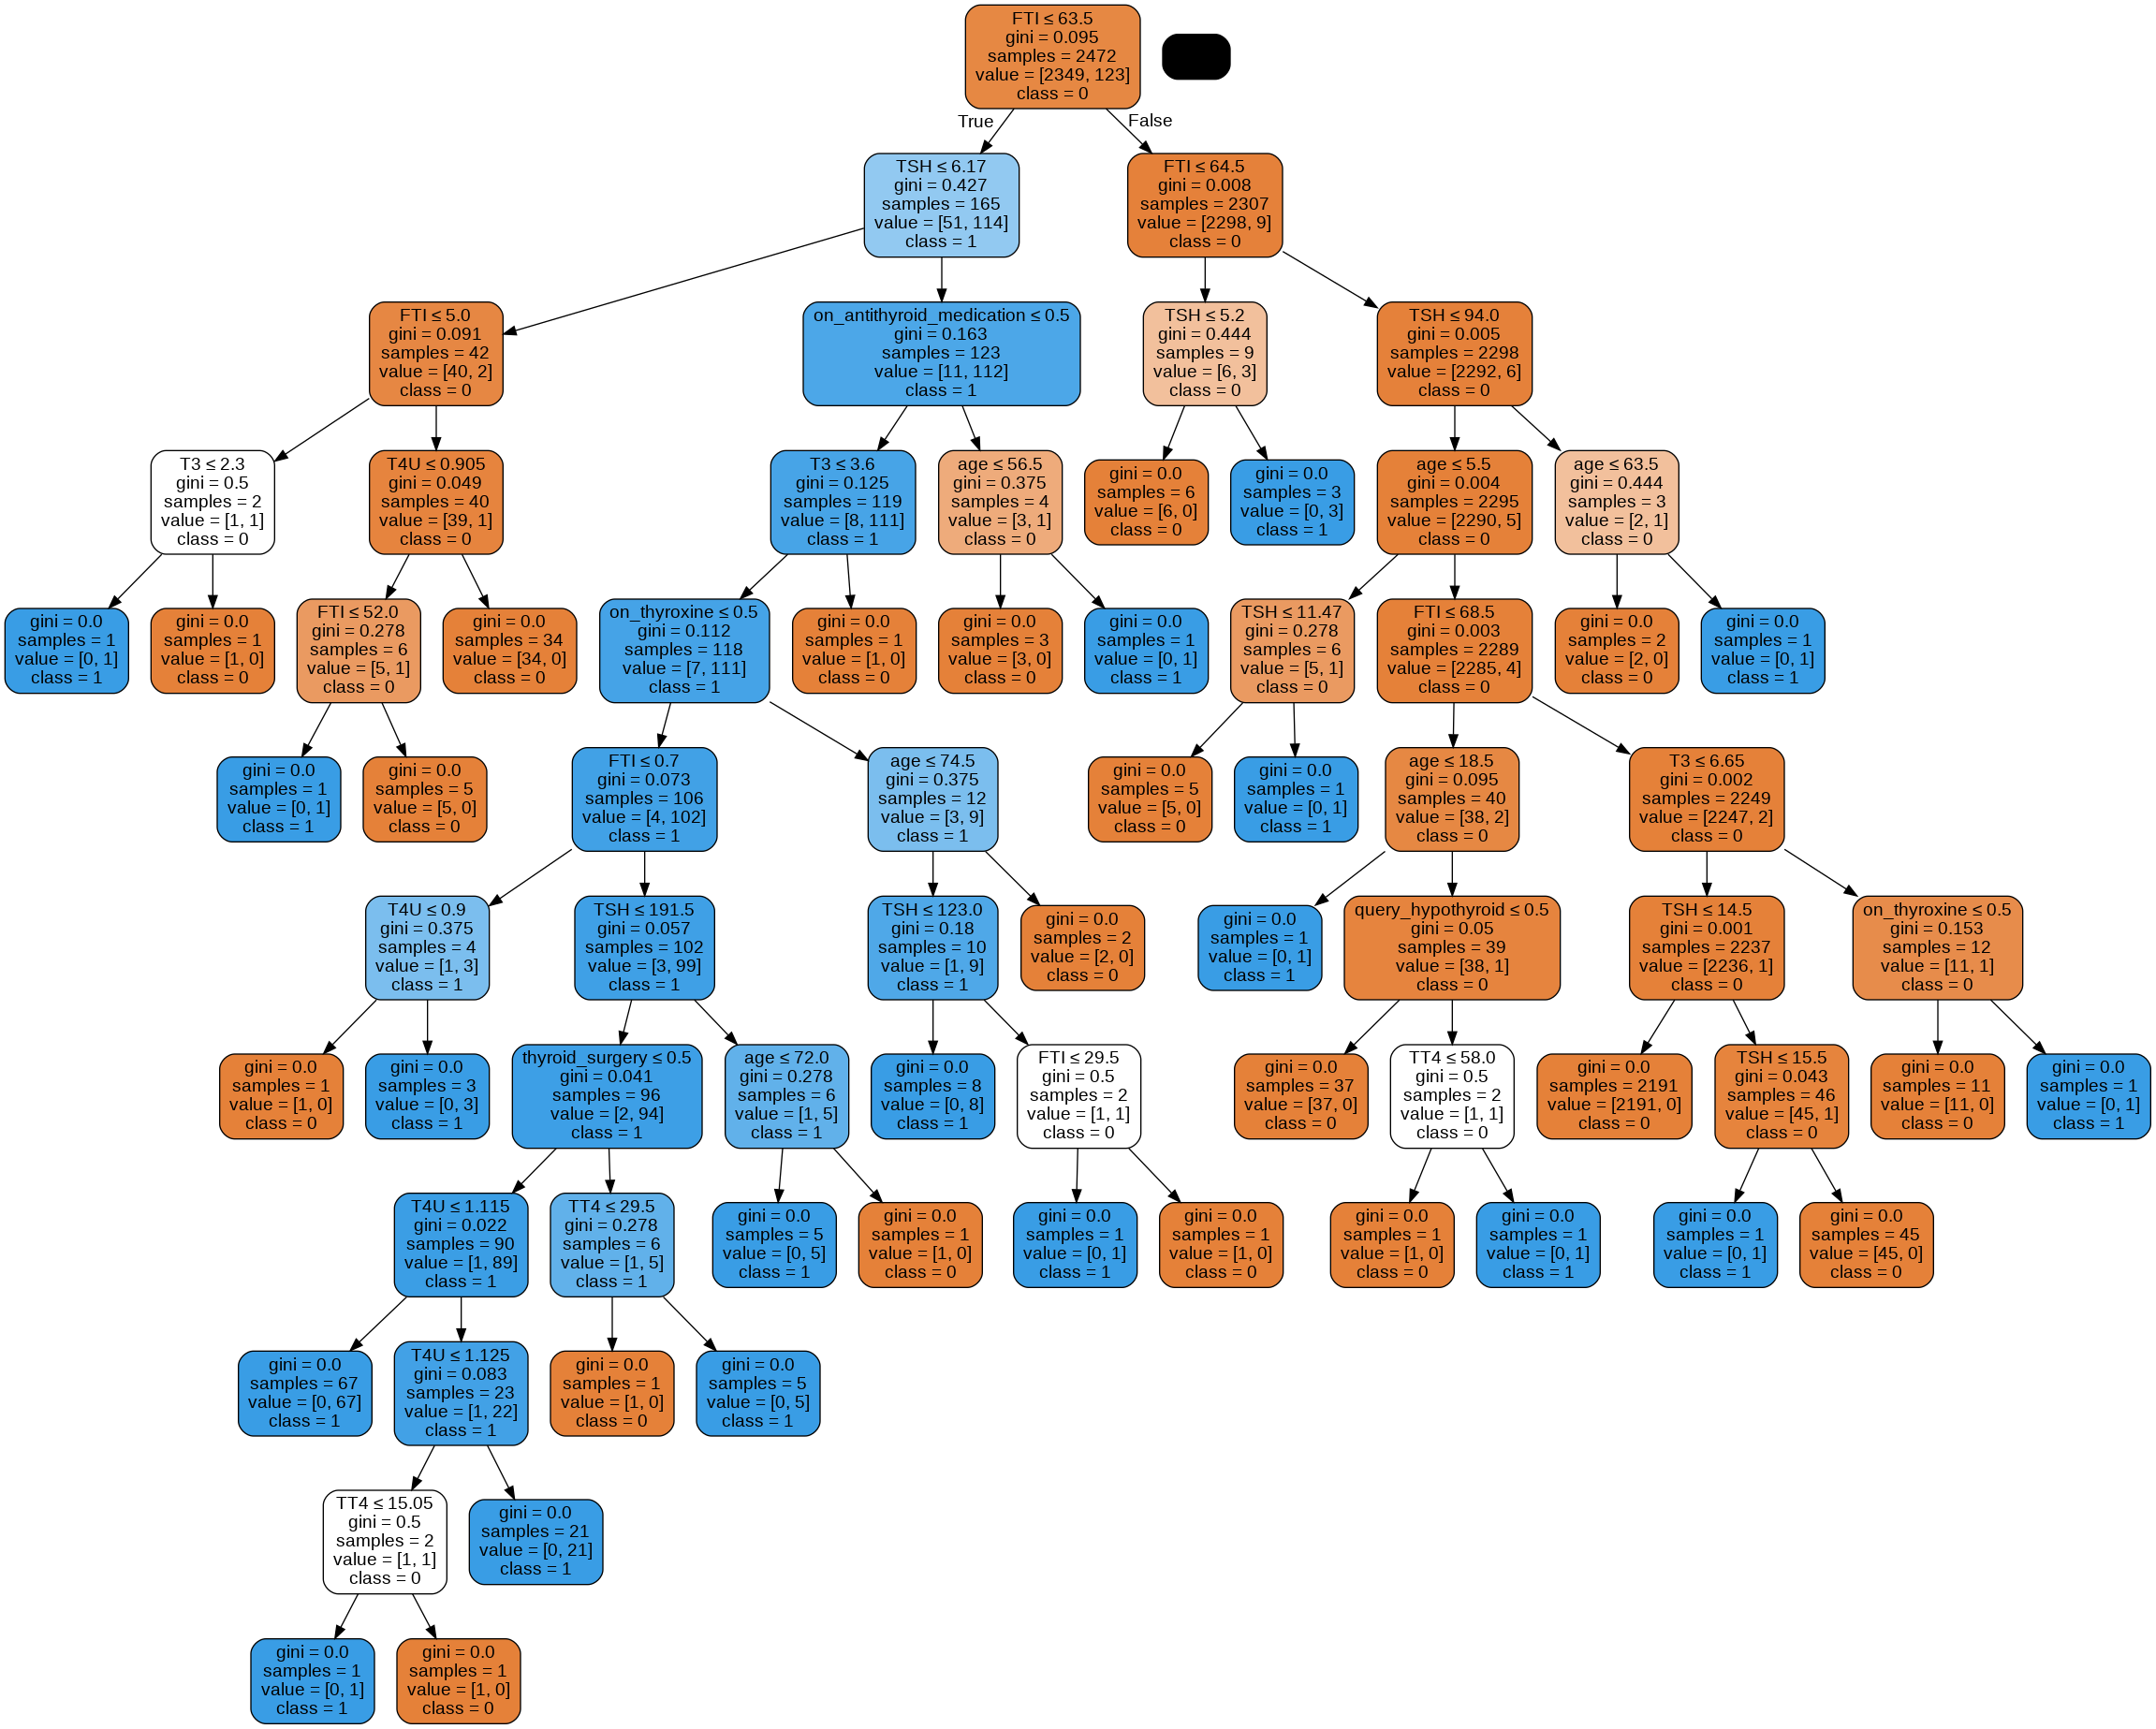

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names = ['0', '1'] )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism.png')
Image(graph.create_png())

**Observations**

???

**Conclusion** 

??? 

##7.  Random Forests

Random Forest is a bagging technique that creates multiple random decision trees that are all independent of each other and combine their overall performance to make predictions. The random trees (sub-trees) each train on a random subset of data and uses a random subset of the features hence these mechanisms result to a better fit. As we have observed that our decision tree resulted to an overfit model, we will use random forests to try and alleviate this over-fitting.

In [ ]:
# To obtain a deterministic behavior during fitting, we will fix the random state to 60
# We will alter the parameter n_estimators to see the effect this parameter has on our model
#we will set min_samples_split and max_depth as we don't want an over-complex tree.
forest = RandomForestClassifier(n_estimators = 100, random_state=60, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# printing the metrics 
model_results('Random Forest',y_test, y_pred)

Model  Accuracy  f1_score
0   Decision Tree  0.987076  0.857143
1   Random Forest  0.988691  0.851064
2       Ada Boost  0.000000  0.000000
3      Linear SVC  0.000000  0.000000
4  Polynomial SVC  0.000000  0.000000
5         RBF SVC  0.000000  0.000000

We will visualize two trees to observe the difference between the two trees

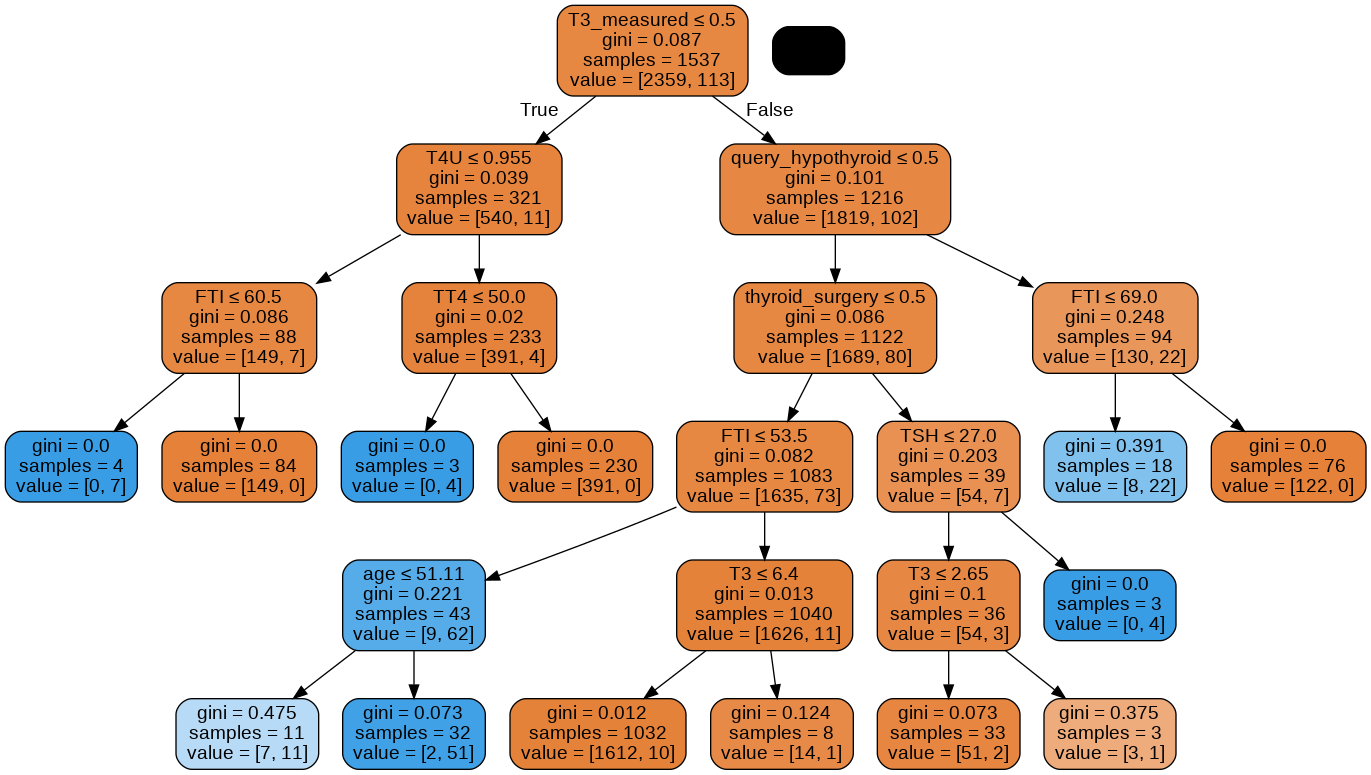

In [ ]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[99]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

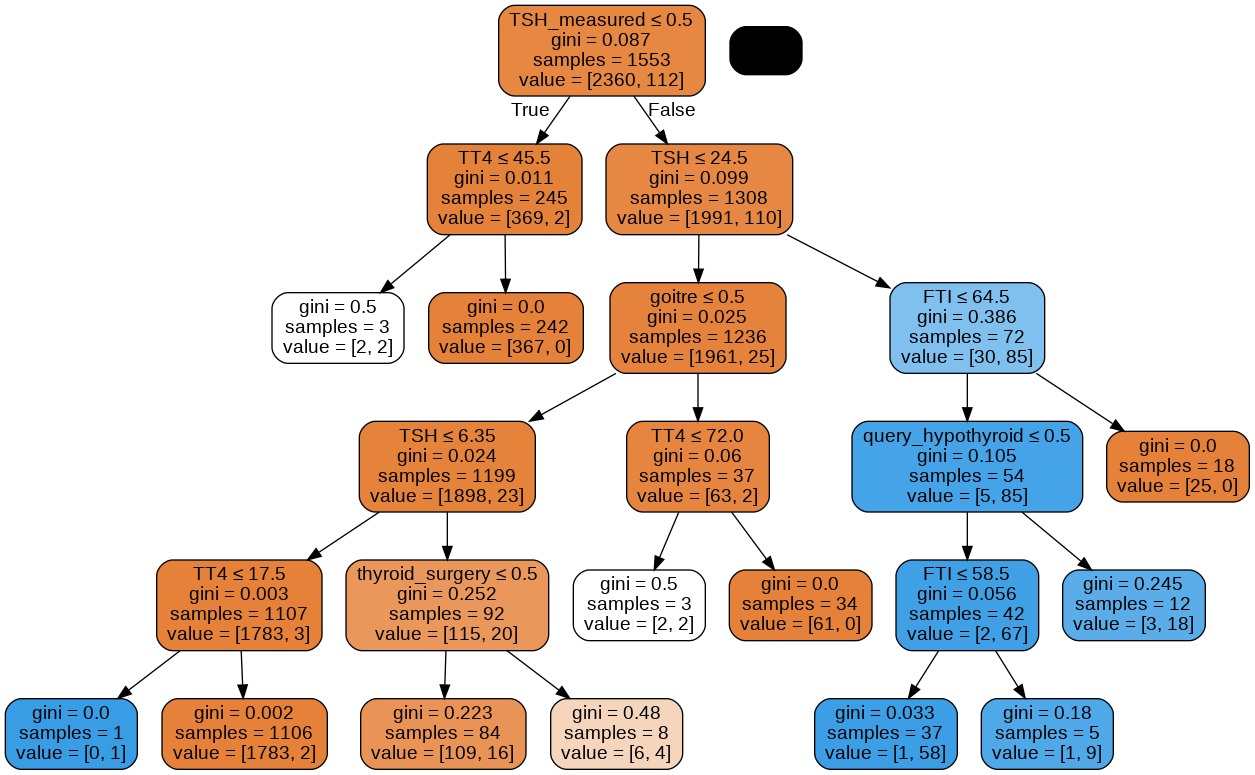

In [ ]:
# visualizing the 50th tree
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

**Observations**
???


In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# We will sort the values in descending order, so we can see the most important features first since we care about the most important features.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TSH                  Importance: 0.73
Variable: FTI                  Importance: 0.21
Variable: TT4                  Importance: 0.04
Variable: thyroid_surgery      Importance: 0.01
Variable: TSH_measured         Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: T3                   Importance: 0.0
Variable: TT4_measured         Importance: 0.0
Variable: T4U_measured         Importance: 0.0
Var

**Observations**

???

Obtaining a visualization of the variable feature importance.

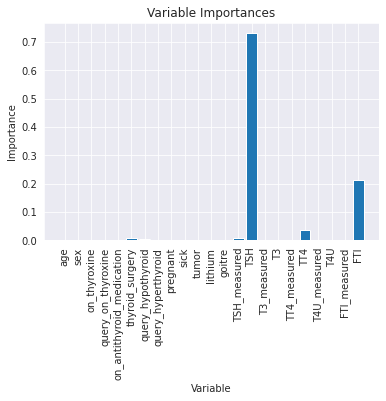

In [ ]:
# Import matplotlib for plotting 
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Key take-aways from the Random Forests**

???

##8. Ada-Boost

Ada Boost is a Boosting technique that aims to alleviate over-fitting. We combine Ada Boost with decision trees.
We wil use Ada Boost to assess if it will be a better model as it has the following advantages over Random Forests.

1. Unlike in Random Forests where each tree has an equal vote on the final classification,forests of stumps made with Ada Boost stumps have more say in the final classification than others i.e larger stumps have more say in the final classification than smaler stumps.  
2. In Random forests, each decison tree is made independently of the others while in Adaboost, the order is important in that the error the first stump makes influence how the second stump is made.


In [ ]:
# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                          n_estimators=200, random_state=60)
# fitting the model to our train data
ada_boost = ada_boost.fit(X_train, y_train)

# making predictions
y_pred= ada_boost.predict(X_test)

# printing the metrics 
model_results('Ada Boost',y_test, y_pred)

Model  Accuracy  f1_score
0   Decision Tree  0.987076  0.857143
1   Random Forest  0.988691  0.851064
2       Ada Boost  0.991922  0.897959
3      Linear SVC  0.000000  0.000000
4  Polynomial SVC  0.000000  0.000000
5         RBF SVC  0.000000  0.000000

In order to make the most out of the Ada Boost, we will change the parameters to see how this affects our model.

**How does changing the maximum depth affect our model?** 


**How does changing the number of stumps affect the model?**


**Analyse features**


**Conclusion from both models** 

???



##9. Support Vector Machine

SVM is often used for classification best suited for more extreme cases. SVM separates classes using the best hyperplane that maximizes the distance between the data points of the different classes. (margin). It is necessary to maximize the margin to avoid the risk of misclassification. The objective of SVM is to find a hyperplane in an N-dimensional space that distinctively classifies the data points. 

SVM optimization occurs by minimizing the decision vector, hence, the optimal hyperplane is influenced by the scale of the input features and it’s therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training. Hence, we will use the MinMaxScaler to scale our data.

**Why MinMaxScaler?**

1. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range(difference between the original maximum and original minimum)  
1.  MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data. As all the columns have a different distribution, we would not want to change this 
1.  MinMaxScaler doesn’t reduce the importance of outliers. As we are dealing with a medical problem, outliers are actually very important in making decisions as that is what defines whether a patient is likely to have the desease or not
1.  The default range for the feature returned by MinMaxScaler is 0 to 1 as is recommended for SVM optimization

From the Ada Boost classifier above, we have seen that the most important features are the ???. Hence, we will use the SVM to classify each of these hormones.

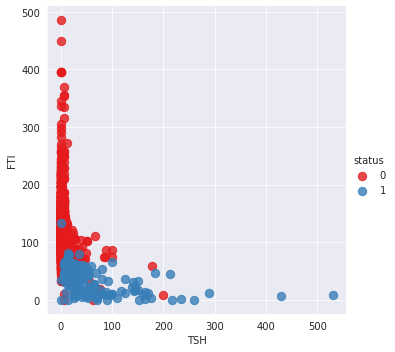

In [ ]:
# plotting TSH and FTI which are the most important features to see if they are applicable for SVM

sns.lmplot('TSH', 'FTI', data=hypothyroid, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

We can clearly see that people who tested negative for hypothyroidism have high levels of FTI hormones and low levels of TSH hormones. However, people who tested positive for hypothyroidism have high levels of TSH hormones and low levels of FTI hormones.

In [ ]:
# creating our dependent and independent variables
X = hypothyroid[["TSH", "FTI"]].values
y = hypothyroid["status"].values

#  Split the data into train and test set with train sex being 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# performing MinMax Scaler to scale our feature set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Fitting a linear svm model

In [ ]:
# build the svm model 
hypothyroidism_model = SVC(kernel = 'linear')

# Train the model using the training set
hypothyroidism_model.fit(X_train,y_train)

SVC(kernel='linear')

####Visualization

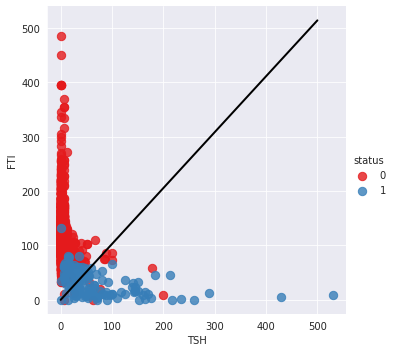

In [ ]:
# Get the separating hyperplane
w = hypothyroidism_model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. 
#We create a range numbers from the highest to the lowest TSH levels recorded 
xx = np.linspace(0, 500)
yy = a * xx - (hypothyroidism_model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TSH', 'FTI', data=hypothyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

We observe that some of the observations have been misclassified.

#### Model Performance

In [ ]:
# Predict the response for the test set
y_pred = hypothyroidism_model.predict(X_test)

# Checking the accurancy of the model
model_results('Linear SVC',y_test, y_pred)

Model  Accuracy  f1_score
0   Decision Tree  0.987076  0.857143
1   Random Forest  0.988691  0.851064
2       Ada Boost  0.991922  0.897959
3      Linear SVC  0.972536  0.514286
4  Polynomial SVC  0.000000  0.000000
5         RBF SVC  0.000000  0.000000

###Fitting a polynomial SVM model

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=1)

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(degree=1, kernel='poly')

####Making prediction

In [ ]:
# Predict the response for the test set
y_pred = polyclassifier.predict(X_test)

####Model evaluation

In [ ]:
# Checking the metrics of the model
model_results('Polynomial SVC',y_test, y_pred)

Model  Accuracy  f1_score
0   Decision Tree  0.987076  0.857143
1   Random Forest  0.988691  0.851064
2       Ada Boost  0.991922  0.897959
3      Linear SVC  0.972536  0.514286
4  Polynomial SVC  0.987076  0.818182
5         RBF SVC  0.000000  0.000000

### Fitting the model: Radial Basis Function

In [ ]:
# Let's now build the svm model 
rbfclassifier = SVC(kernel = 'rbf')

# Train the model using the training set
rbfclassifier.fit(X_train,y_train)

# Predict the response for the test set
rbf_pred = rbfclassifier.predict(X_test)
# s_pred

# Checking the accurancy of the model
model_results('RBF SVC',y_test, rbf_pred)

Model  Accuracy  f1_score
0   Decision Tree  0.987076  0.857143
1   Random Forest  0.988691  0.851064
2       Ada Boost  0.991922  0.897959
3      Linear SVC  0.972536  0.514286
4  Polynomial SVC  0.987076  0.818182
5         RBF SVC  0.987076  0.818182

##10. Advanced SVM

Using the rbf, we will now add an additional feature, _on_antithyroid_medication_ and see how the model will perform with an additional feature

As we are now dealing with multiple classes, we will make use of the kernel trick and the parameters gamma and C of the Radial Basis Function (RBF) kernel SVM to illustrate the effect of these parameters then use a grid to search for the best parameters that will optimize the model.

In [ ]:
# creating dependent and independent variables

H = hypothyroid[["TSH", "FTI", "on_antithyroid_medication"]].values
g = hypothyroid["status"].values


# splitting the variables to train and test sets
H_train, H_test, g_train, g_test = train_test_split(H, g, test_size = 0.2, random_state = 0)

# performing MinMax Scaler to scale our feature set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
T_train = scaler.fit_transform(H_train)
T_test = scaler.transform(H_test)

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(H_train, g_train)

# Predict the response for the test set
g_pred = rbfclassifier.predict(H_test)

# assessing the model



Adding the _on_antithyroxine_medication_ feature has not changed the performance of our model at all, we still have an accuracy of 98.5%. We now try to use the parameters to see what effect they have on our model.

In [ ]:
# Building the model 
rbfclassifier_tuned = SVC(kernel='rbf', gamma=0.01, C=2.0)

# Training the model using the training set
rbfclassifier_tuned.fit(H_train, g_train)

# Predict the response for the test set
g_pred = rbfclassifier_tuned.predict(H_test)

# assessing the model



We will now introduce the other important features obtained from the Ada Boost and search for the best parameters from a grid

In [ ]:
R= hypothyroid[["TSH", "FTI", "on_antithyroid_medication", "age", "on_thyroxine", "T3", "TT4"]].values
q = hypothyroid["status"].values

# splitting the variables to train and test sets
R_train, R_test, q_train, q_test = train_test_split(R, q, test_size = 0.2, random_state = 0)

In [ ]:
# searching for the best parameters using grid
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel ="rbf"), param_grid=param_grid, cv=cv)
grid.fit(R_train, q_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

##11. Challenging the Solution

We have built the following models:

    *Random Forests, Ada boost and SVM *



##12. Follow up questions

From our objectives and metrics for success, we can consider this study ???